In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 96, kernel_size = 11, input_shape = (227, 227, 3), strides = 4, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3, strides = 2))
model.add(Conv2D(filters = 256, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same' ))
model.add(Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same' ))
model.add(Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same' ))
model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64896)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     265,818,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 290,896,130 (1.08 GB)

 Trainable params: 290,896,130 (1.08 GB)

 Non-trainable params: 0 (0.00 B)

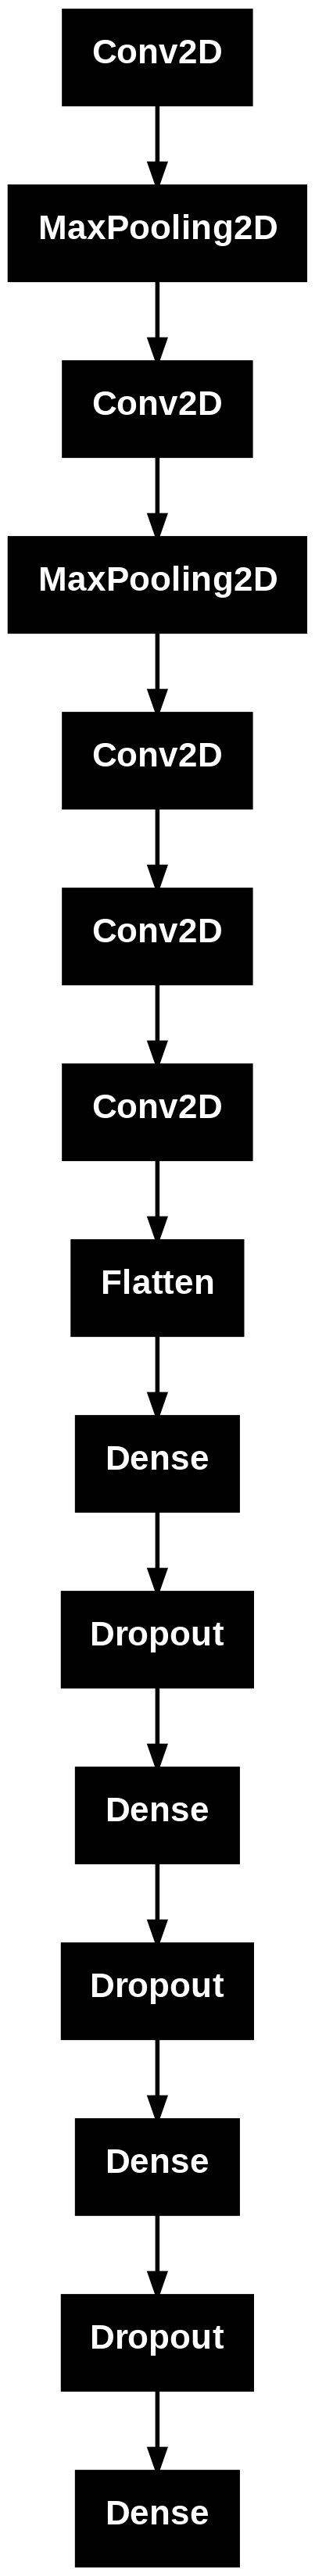

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
batch_size =32

In [ ]:
import cv2
def resizeimg(img):
  resize_img = cv2.resize(img, (227, 227))
  resize_img = np.stack((resize_img,)*3, axis = -1)
  return resize_img

In [ ]:
def data(X, Y, batch_size):
  while True:

    for start in range(0, len(X), batch_size):
      end = min(start + batch_size, len(X_train))
      batch_X = X[start:end]
      batch_Y = Y[start:end]
      batch_X = np.array([resizeimg(img) for img in batch_X])
      yield batch_X, batch_Y


In [ ]:
train = data(X_train[10000:], Y_train[10000:], batch_size)
test = data(X_test, Y_test, batch_size)
steps_per_epoch = len(X_train)//batch_size
validation_steps = len(X_test)//batch_size

In [ ]:
valid = data(X_train[:10000], Y_train[:10000], batch_size)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'accuracy', patience = 3, verbose = 1, mode = 'auto')
history = model.fit(train, steps_per_epoch = steps_per_epoch, epochs = 5,  validation_steps = validation_steps, validation_data = valid, callbacks = [es])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 218s 109ms/step - accuracy: 0.8297 - loss: 0.6063 - val_accuracy: 0.9779 - val_loss: 0.0962
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 197s 105ms/step - accuracy: 0.9761 - loss: 0.0947 - val_accuracy: 0.9807 - val_loss: 0.0822
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 196s 104ms/step - accuracy: 0.9783 - loss: 0.0895 - val_accuracy: 0.9819 - val_loss: 0.0856
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 195s 104ms/step - accuracy: 0.9814 - loss: 0.0802 - val_accuracy: 0.9831 - val_loss: 0.0760
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 194s 103ms/step - accuracy: 0.9848 - loss: 0.0710 - val_accuracy: 0.9795 - val_loss: 0.0828


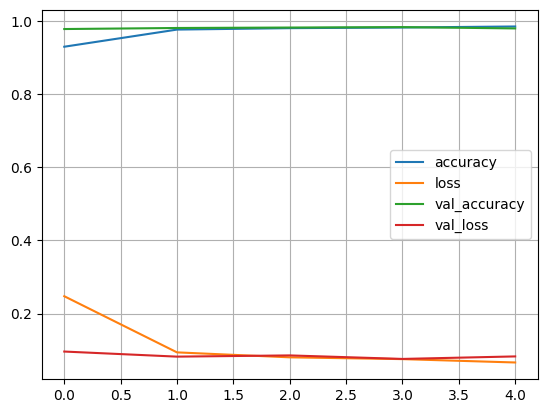

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [ ]:
X_test, Y_test = next(test)
print(X_test.shape)
print(Y_test.shape)

(32, 227, 227, 3)
(32,)


In [ ]:
print(model.evaluate(X_test, Y_test))
proba_y = model.predict(X_test[:10])
pred_y = np.argmax(proba_y, axis=1)

print(pred_y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9688 - loss: 0.1575
[0.15746571123600006, 0.96875]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[7 2 1 0 4 1 4 9 5 9]


In [ ]:
print(proba_y.shape)

(10, 10)


In [ ]:
print(pred_y.shape)

(10,)


In [ ]:
Y_test[:10].shape

(10,)

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(pred_y, Y_test[:10])
print(conf)

[[1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2]]


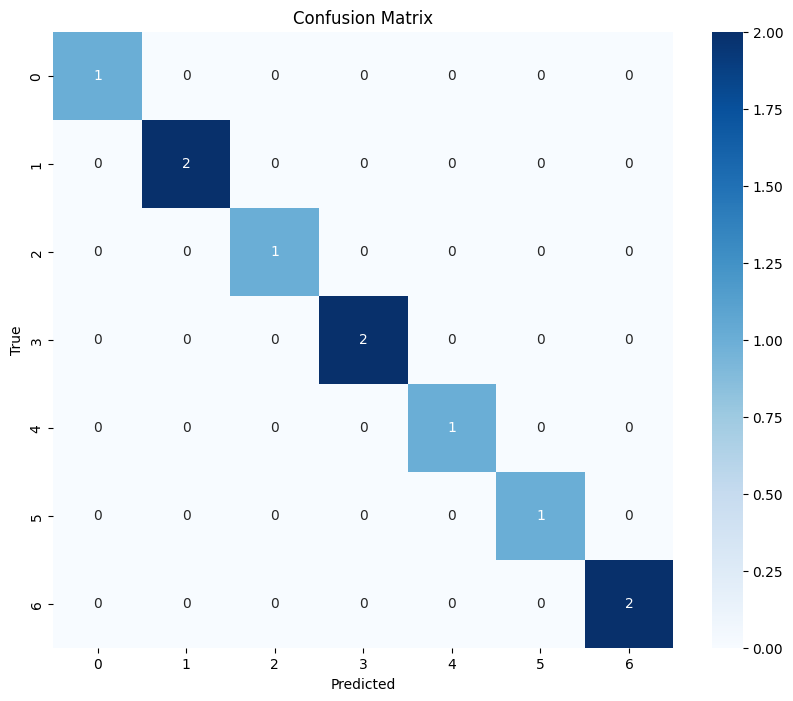

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()